## This notebook was made to demonstrate the functions on scraping_python_functions, and to show how the data can be aggregated on post-level.

In [1]:
##import everythin and define the reddit connection
from scraping_python_functions import *
reddit=init_reddit()

Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [13]:
##Load and process the comment dataset
data_comments=get_comments_from_hot(reddit)
processed_data=process_data(data_comments)

In [14]:
processed_data.to_csv("../data_for_plotting/comment_data.csv")
processed_data.head(10)

,text,score,level,post,sentiment,joy,optimism,anger,sadness
0,"For everyone who is young, I've been saying fo...",47,top,"Daily Discussion Thread for September 21, 2023",1,1.908880,0.000000,0.000000,1.209406
1,![img](emote|t5_2th52|27189),10,second,"Daily Discussion Thread for September 21, 2023",5,0.000000,1.867761,0.126684,0.000000
2,I also bought puts. Stonk go down plz,9,second,"Daily Discussion Thread for September 21, 2023",1,0.199352,0.014313,0.378397,0.390283
3,Market ------> *rotating out of tech* \n\nWSB ...,30,top,"Daily Discussion Thread for September 21, 2023",1,0.762579,0.000000,0.000000,2.167609
4,This place is at its best on deep red days,29,top,"Daily Discussion Thread for September 21, 2023",5,1.959060,0.000000,0.000000,0.451662
5,Is this my third once in a lifetime event?,28,top,"Daily Discussion Thread for September 21, 2023",1,0.000000,1.974517,0.085778,0.000000
6,"5 months ago: ""Higher for longer"" \n**the mar...",48,top,"Daily Discussion Thread for September 21, 2023",1,0.400441,0.986572,0.000000,0.000000
7,the fed literally sold the top and dumb ass bu...,20,top,"Daily Discussion Thread for September 21, 2023",1,1.477069,0.000000,0.000000,0.000000
8,If we close green there will be a maximum of 1...,16,top,"Daily Discussion Thread for September 21, 2023",1,1.325549,0.000000,0.000000,0.989467
9,Today is Back to School night at my 8 year old...,15,top,"Daily Discussion Thread for September 21, 2023",5,0.000000,2.038940,0.849687,0.000000


### Create the plots for the comment dataset

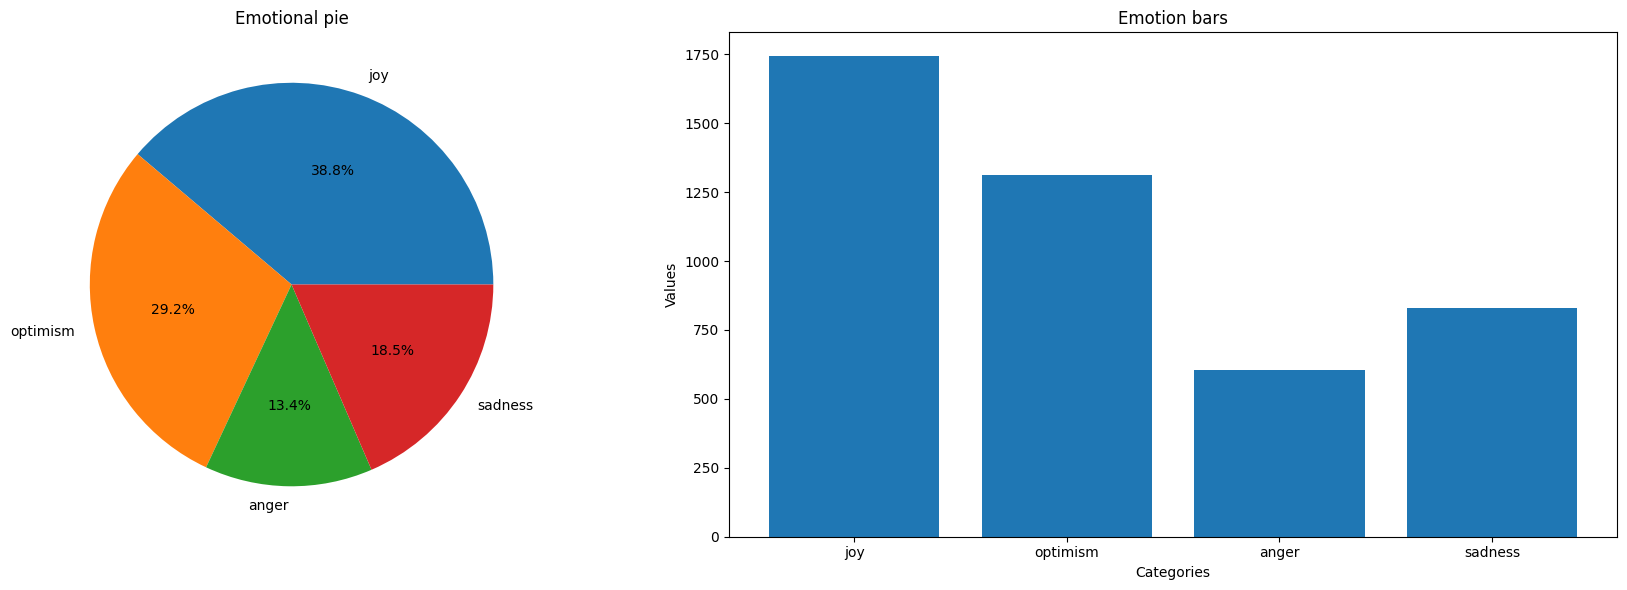

In [15]:
plot_emotions(processed_data)

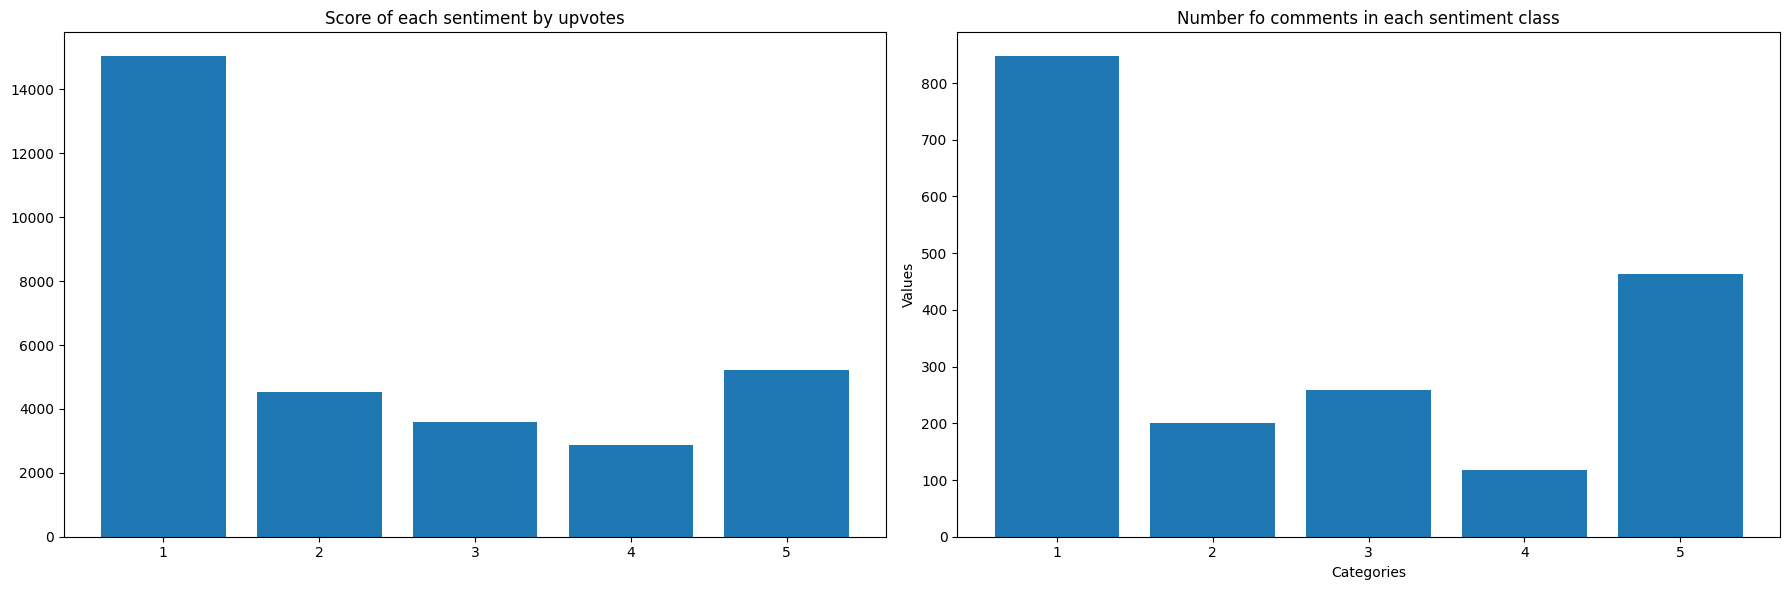

In [16]:
sentiment_barplots(processed_data)

### Show the creation of the post dataset 

In [17]:
##We can probably also make some kind of visualization out of the below data 
# to show which posts performed well, so that the user can reference that while reading the post
# sentiment plot.

post_details=get_post_info(reddit)
processed_post_details=process_data(post_details, text_column="titles")
processed_post_details.head(10)

,ids,titles,scores,controversiality,bodies,original,num_comments,sentiment,joy,optimism,anger,sadness
0,16obuux,"Daily Discussion Thread for September 21, 2023",58,0.84,**Join [WSB's community voice chat](https://di...,False,4934,4,0.000000,0.067706,1.721694,0.000000
1,16nmz62,⚠️Breaking: JPOW pre-FOMC press conference⚠️,2534,0.95,,True,160,4,0.242933,0.263452,0.000000,0.545039
2,16oi9an,"Somebody had a 45,650% gain in one overnight t...",1292,0.97,,False,348,1,0.000000,2.330568,0.648718,0.000000
3,16ofrlh,What J Pow really meant during the FOMC,224,0.93,,True,28,5,0.345198,0.000000,0.000000,1.723032
4,16ofaf2,The stock market fell sharply in response to t...,193,0.85,Everyone should know what happened at the Fede...,False,181,2,0.999766,0.000000,0.000000,2.366180
5,16o28hc,JPOW’s Bernie Sanders impersonation,1249,0.94,,False,68,5,0.051071,2.131739,0.000000,0.000000
6,16nvqtm,For the regards who don't know what the hell j...,2402,0.92,For those regards who don't know why markets t...,False,546,3,2.233747,0.000000,0.000000,1.280669
7,16og88o,avgo gains!! closed,84,0.92,,False,39,1,0.000000,1.742516,0.056038,0.000000
8,16ojc9u,3K into 23k in two days,52,0.92,"I was at 4,700$ yesterday I had SPY 9/21 445p ...",False,33,1,0.000000,1.786668,0.213945,0.000000
9,16o8uh7,🥶 winter is coming.,253,0.95,I hope the Moon boy's Gaming PCs run hot like ...,False,32,5,0.000000,0.159848,0.000000,1.812649


In [18]:
#Some grouping is done so that the average stats can be plotted

df_groupedby=processed_data.groupby("post").agg({"sentiment":"mean", 
                "joy": "sum", "optimism":"sum", "anger":"sum", "sadness":"sum"})


#change emotion values to be a percentage of a total
df_groupedby[['joy', 'optimism','anger','sadness']] = df_groupedby[['joy', 'optimism','anger','sadness']].apply(
    lambda row: row / row.sum(), axis=1)

df_groupedby.to_csv("../data_for_plotting/post_data.csv")
df_groupedby.head(10)

,sentiment,joy,optimism,anger,sadness
post,,,,,
3K into 23k in two days,2.052632,0.343772,0.320396,0.194631,0.141201
Billionaires changing their view each week,2.631579,0.613747,0.164124,0.120924,0.101204
Cisco buying cybersecurity company Splunk for $28 Billion,2.631579,0.281239,0.402204,0.169022,0.147535
Cramer finally capitulates to meme stock mania!,2.000000,0.421072,0.338037,0.075049,0.165843
Cybertruck Spotted ⛏️,2.490385,0.338169,0.428236,0.042553,0.191042
"Daily Discussion Thread for September 21, 2023",2.275100,0.389063,0.260529,0.113568,0.236840
"Dollar General is in a ‘really bad situation,’ and investors should stay away, Jim Cramer says",2.461039,0.438051,0.218263,0.124997,0.218689
For the regards who don't know what the hell just happened,2.629091,0.412245,0.227043,0.191583,0.169128
Former professional gamer transitioning into a highly regarded trader.,2.684524,0.305293,0.325475,0.252229,0.117003


### Create plots hopefully showing the general sentiment and emotions found on currently hot posts.

It might not be correct to show sentiment on the same plot.

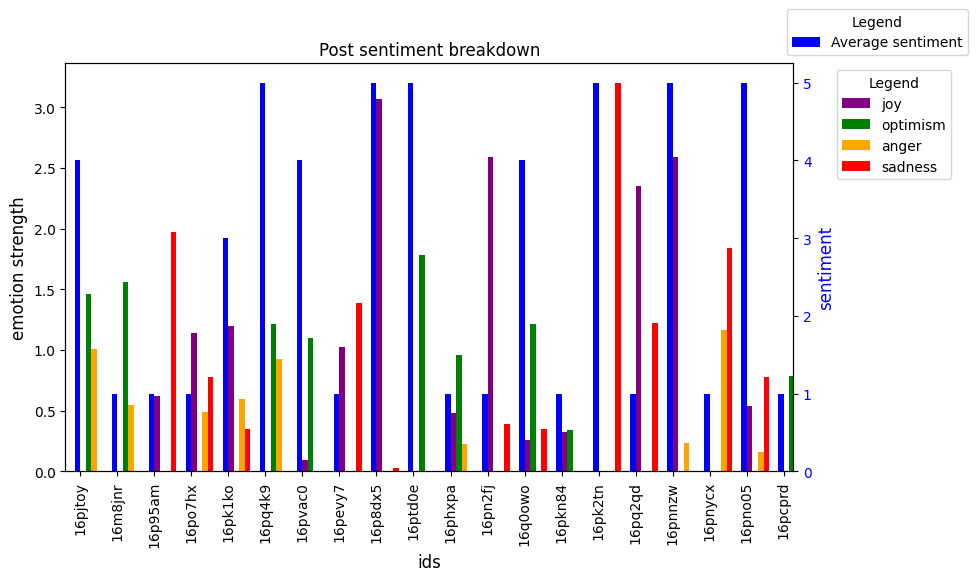

In [15]:
#df = df_groupedby
df = pd.read_csv("../data_for_plotting/post_data.csv", index_col="ids")

fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['purple', 'green', 'orange', 'red', 'black']
ax1.set_xlabel('Post ids', fontsize=12)
ax1.set_ylabel('emotion strength', color='black', fontsize=12)
ax1 = df[["joy","optimism","anger","sadness"]].plot(kind='bar', ax=ax1, color=colors, width=0.6, position=0)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('sentiment', color=color, fontsize=12)
ax2 = df['sentiment'].plot(kind='bar', ax=ax2, color=color, width=0.15, position=1)
ax2.tick_params(axis='y', labelcolor=color)

# Create custom legend labels with colors
legend_labels = ['Joy', 'Optimism', 'Anger', 'Sadness', 'Average Sentiment']

# Plotting dummy lines to create legend with custom labels and colors
#for i, label in enumerate(legend_labels):
#    ax1.plot([], label=label, color=colors[i])
plt.title('Post sentiment breakdown')
ax1.legend(loc='upper left', title='Legend', bbox_to_anchor=(1.05, 1))
ax2.legend(loc='upper right', title='Legend', labels=['Average sentiment'], bbox_to_anchor=(1.25, 1.15))

plt.tight_layout()
plt.savefig("post_breakdown.png")